# <font color = 'Green'>Python_Programming_TensorFlow_Keras</font>

## <font color = 'Blue'>Question 1:</font>

**1. Use the make moons dataset to sequentially build three different SVM classifiers. Each subsequent SVM classifier should be designed to “improve” the previous SVM classifier.**

**2. Using comments after each classifier justify the choice for the next SVM classifier that you are building (the justification should be prior to building the classifier). The results do not have to show that subsequent SVM classifiers were better, but the justification provided for trying the ‘next’ classifier each time should make sense.**

**3. Feel free to use any choice of noise, or number of points, but all comparisons should be on a test set.**

**4. Finally build any ensemble model as well, and compare the predictions of the ensemble to the three SVM classifiers.**

### **SVM Classifiers**

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons

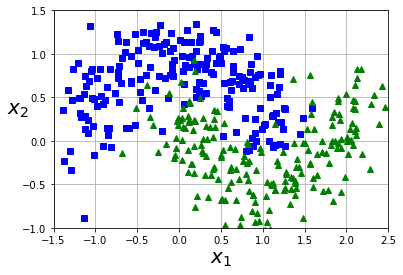

In [2]:
#Generate Make Moons data and plot the datapoints
X, y = make_moons(n_samples=400, noise=0.25, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [3]:
#Train test split  (80-20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

**CLASSIFIER - #1: We'll start with a Linear Classifier.**

In [4]:
#Import libraries and build 1st Classifier model
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures

poly1_kernel_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=100, loss="hinge", random_state=42))
    ])
poly1_kernel_svm_clf.fit(X_train, y_train)
y1_pred=poly1_kernel_svm_clf.predict(X_test)
classification_poly1 = classification_report(poly1_kernel_svm_clf.predict(X_test),y_test)
print(classification_poly1)

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.95      0.85      0.90        47

    accuracy                           0.89        80
   macro avg       0.88      0.90      0.89        80
weighted avg       0.90      0.89      0.89        80



C:\Users\surya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


**CLASSIFIER - #2: Our data follows Polynomial pattern so I used Polynomial Classifier.**

In [5]:
#Build 2nd Classifier model
poly2_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=10, C=100))
    ])

poly2_kernel_svm_clf.fit(X_train, y_train)
y2_pred=poly2_kernel_svm_clf.predict(X_test)
classification_poly2 = classification_report(poly2_kernel_svm_clf.predict(X_test),y_test)
print(classification_poly2)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.95      0.91      0.93        44

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



**CLASSIFIER - #3: Changed parameters for the Polynomial Classifier like degree and C value.**

**CHANGE - 1: Increasing degree changes the multidimensional space used to classify changes.**

**CHANGE - 2: Increasing C value adds up additional space between dimensions which helps to avoid misclassification.**

In [ ]:
#Build 3rd Classifier model
poly3_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=15, coef0=20, C=100))
    ])
poly3_kernel_svm_clf.fit(X_train, y_train)
y3_pred=poly2_kernel_svm_clf.predict(X_test)
classification_poly3 = classification_report(poly3_kernel_svm_clf.predict(X_test),y_test)
print(classification_poly3)

### **Ensemble Models**

In [6]:
#Import libraries
import os
np.random.seed(42)
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

#Build three ensemble models
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [7]:
#Show ensemble model accuracies
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7625
RandomForestClassifier 0.9375
SVC 0.9
VotingClassifier 0.8875


**RESULT: SVM Classifier shows better accuracy than Ensemble Models.**

## <font color = 'Blue'>Question 2:</font>

**Predict “ocean proximity” in the housing.csv file using both MLP Classifier and Keras. Use 50% of the data as the test set.**

**1. Using the MLP Classifier, build and train a deep neural network with three hidden layers of 15, 10 and 7 nodes with max iterations set to 500. Do this with and without early stopping. In each case, compute and print the confusion matrix on the test set, as well as print the iteration at which the training terminated. Did early stopping help, or hurt?**

**2. Use Keras to build a network of the same structure (i.e. nodes and hidden layers). In Keras it is OK if the other hyper-parameters are different and in Keras you can build only one model (with OR without early stopping – your choice). Print the confusion matrix on the test set (with or without early stopping – up to you). Was the model built in keras better or worse than what you got previously with MLP classifiers?**

### **MLP Classifier**

In [8]:
#Import pandas library
import pandas as pd
np.random.seed(42)

#Read 'Housing' csv file
housing = pd.read_csv('housing.csv')

In [9]:
#Drop the missing values
housing.dropna(axis=0, inplace=True)

#Index reset
housing.reset_index(inplace=True, drop=True)

housing.describe()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
#Set the response and target variables and drop other labels
housing_X = housing.drop("ocean_proximity", axis=1)

#Select the label
housing_target = housing[["ocean_proximity"]]
housing_target.value_counts()

ocean_proximity
<1H OCEAN          9034
INLAND             6496
NEAR OCEAN         2628
NEAR BAY           2270
ISLAND                5
dtype: int64

In [11]:
#Data transform using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_X_std = scaler.fit_transform(housing_X)

In [12]:
#Train test split (50-50%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_X_std, housing_target, test_size=0.5)
X_train.shape, X_test.shape

((10216, 9), (10217, 9))

In [13]:
#Build DNN model using MLP classifier without early stopping
from sklearn.neural_network import MLPClassifier

dnn_clf = MLPClassifier(hidden_layer_sizes=(15,10,7),
                       max_iter=500)

dnn_clf.fit(X_train, y_train)

C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(hidden_layer_sizes=(15, 10, 7), max_iter=500)

In [14]:
#Print accuracy for the model
from sklearn.metrics import accuracy_score

y_test_pred = dnn_clf.predict(X_test)

print("Accuracy of DNN without early stopping: ", str(accuracy_score(y_test, y_test_pred)))

Accuracy of DNN without early stopping:  0.9295292160125281


In [15]:
#Show confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[4246,   62,    0,   20,  217],
       [ 149, 3055,    0,   12,    1],
       [   0,    0,    0,    0,    3],
       [  17,    2,    0, 1069,   39],
       [ 162,    0,    0,   36, 1127]], dtype=int64)

In [16]:
dnn_clf.n_iter_

429

### **Early Stopping**

In [17]:
#Build DNN model using MLP classifier with early stopping
dnn_clf_with_stop = MLPClassifier(hidden_layer_sizes=(15,10,7),
                       max_iter=500,
                       early_stopping=True)

dnn_clf_with_stop.fit(X_train, y_train)

C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(15, 10, 7), max_iter=500)

In [18]:
#Print accuracy and confusion matrix for the model
y_test_pred_with_stop = dnn_clf_with_stop.predict(X_test)
print("Accuracy of DNN with early stopping: ", str(accuracy_score(y_test, y_test_pred_with_stop)))
confusion_matrix(y_test, y_test_pred_with_stop)

Accuracy of DNN with early stopping:  0.8620925907800724


array([[4022,   76,    0,  226,  221],
       [ 146, 3018,    0,   53,    0],
       [   0,    0,    0,    0,    3],
       [ 135,   33,    0,  913,   46],
       [ 348,    0,    0,  122,  855]], dtype=int64)

In [19]:
dnn_clf_with_stop.n_iter_

44

**RESULT: Early Stopping hurts the model as we got less accuracy (Without: 93% vs With: 86%).**

### **Keras**

In [20]:
#Import library
import tensorflow as tf

In [21]:
#Target and response variables
housing_X_std.shape,housing_target.shape

((20433, 9), (20433, 1))

In [22]:
#Data transform on the target variable
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_labels_ord = ordinal_encoder.fit_transform(housing_target)

In [23]:
housing_labels_int = housing_labels_ord.astype(int)

housing_labels_int.dtype

dtype('int32')

In [24]:
#Train test split (50-50%)
X_train, X_test, y_train, y_test = train_test_split(housing_X_std, housing_labels_int, test_size=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10216, 9), (10217, 9), (10216, 1), (10217, 1))

In [25]:
#Import libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Fix random seed reproducibility
np.random.seed(42)

In [26]:
#Build model without early stopping
model = Sequential()

model.add(Dense(15, input_dim=9, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='relu'))

#Final layer: Need 5 nodes with softmax (As we have 5 categories)
model.add(Dense(5, activation='softmax'))

In [27]:
sgd = keras.optimizers.SGD(lr=0.05)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
103/103 [==============================] - 0s 541us/step - loss: 1.3839 - accuracy: 0.4226
Epoch 2/100
103/103 [==============================] - 0s 494us/step - loss: 1.1691 - accuracy: 0.5418
Epoch 3/100
103/103 [==============================] - 0s 542us/step - loss: 1.0048 - accuracy: 0.6182
Epoch 4/100
103/103 [==============================] - 0s 600us/step - loss: 0.8366 - accuracy: 0.6913
Epoch 5/100
103/103 [==============================] - 0s 978us/step - loss: 0.6905 - accuracy: 0.7384
Epoch 6/100
103/103 [==============================] - 0s 939us/step - loss: 0.6123 - accuracy: 0.7625
Epoch 7/100
103/103 [==============================] - 0s 685us/step - loss: 0.5678 - accuracy: 0.7748
Epoch 8/100
103/103 [==============================] - 0s 513us/step - loss: 0.5273 - accuracy: 0.7843
Epoch 9/100
103/103 [==============================] - 0s 542us/step - loss: 0.4841 - accuracy: 0.7949
Epoch 10/100
103/103 [==============================] - 0s 581us/step - l

In [29]:
y_test_pred = model.predict(X_test)

y_test_pred.shape,y_test.shape,X_test.shape

#Test split prediction
confusion_matrix(y_test,np.argmax(y_test_pred,axis=1).reshape(-1,1))

array([[4421,   43,    0,   26,   77],
       [ 196, 3063,    0,   11,    0],
       [   0,    0,    0,    0,    4],
       [ 189,   46,    0,  875,    4],
       [ 340,    0,    0,   67,  855]], dtype=int64)

In [30]:
#Accuracy on test set
scores = model.evaluate(X_test, y_test)
print("Accuracy on DNN without using early stopping:")
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

320/320 [==============================] - 0s 415us/step - loss: 0.2564 - accuracy: 0.9018
Accuracy on DNN without using early stopping:

accuracy: 90.18%


### **Early Stopping**

In [31]:
#Build model with early stopping
from tensorflow.keras.callbacks import EarlyStopping


earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

callback = [earlystop]

model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=100, batch_size=100, callbacks=callback)

Epoch 1/100
103/103 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9207 - val_loss: 0.3491 - val_accuracy: 0.8503
Epoch 2/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9198 - val_loss: 0.7449 - val_accuracy: 0.7514
Epoch 3/100
103/103 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9146 - val_loss: 0.4144 - val_accuracy: 0.8812
Epoch 4/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9191 - val_loss: 0.1963 - val_accuracy: 0.9183
Epoch 5/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9189 - val_loss: 0.2577 - val_accuracy: 0.9014
Epoch 6/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1943 - accuracy: 0.9168 - val_loss: 0.2017 - val_accuracy: 0.9194
Epoch 7/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1967 - accuracy: 0.9169 - val_loss: 0.4577 - val_accuracy: 0.8677

In [32]:
#Accuracy on test set
scores = model.evaluate(X_test, y_test)
print("Accuracy on DNN with using early stopping:")
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

320/320 [==============================] - 0s 414us/step - loss: 0.2721 - accuracy: 0.8965
Accuracy on DNN with using early stopping:

accuracy: 89.65%


**Based on the results,**

**CASE - 1: Without Early Stopping -> MLP Classifier (93%) is better than model build in Keras (90%).**

**CASE - 2: With Early Stopping -> Model built in Keras (89%) is better than MLP Classifier (86%).**